In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
!mkdir -p ../figures/figS8_sbtA

In [3]:
gly_df = pd.read_excel(
    '../data/Ecoli_CCMB1/AF_2018_sbtA_spotting/031518_CCMB1_colony_counts.xlsx',
    sheet_name='glycerol')

# Separate induced and uninduced DFs for plotting.
mask = gly_df.induction != 'none'
gly_induced_df = gly_df[mask].copy()

mask = gly_df.induction == 'none'
gly_uninduced_df = gly_df[mask].copy()

/opt/miniconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
gly_induced_df.groupby(['strain_label', 'co2']).mean()

colony          count  starting_OD  \
strain_label             co2                                            
CCMB1:p1A+pFA-acRAF      0.5% CO2     1.5       0.000000          0.2   
                         10% CO2      1.5   75833.333333          0.2   
                         ambient      1.5       0.000000          0.2   
CCMB1:p1A+pFA-acRAF-sbtA 0.5% CO2     1.5   75833.333333          0.2   
                         10% CO2      1.5  102500.000000          0.2   
                         ambient      1.5       0.000000          0.2   
CCMB1:p1A+pFA-sbtA       0.5% CO2     1.5   64166.666667          0.2   
                         10% CO2      1.5   61666.666667          0.2   
                         ambient      1.5       0.000000          0.2   
CCMB1:p1A+pFA-sbtA-acRAF 0.5% CO2     1.5   47500.000000          0.2   
                         10% CO2      1.5   50000.000000          0.2   
                         ambient      1.5       0.000000          0.2   
CCMB1:p1A+vec            0.5% CO2     1.5       0.000000          0.2   
                         10% CO2      1.5   72500.000000          0.2   
                         ambient      1.5       0.000000          0.2   
CCMB1:vec+pFA-sbtA       0.5% CO2     1.0       0.000000          0.2   
                         10% CO2      1.0       0.000000          0.2   
                         ambient      1.0       0.000000          0.2   
WT:vec+vec               0.5% CO2     1.0  115000.000000          0.2   
                         10% CO2      1.0   95000.000000          0.2   
                         ambient      1.0  216666.666667          0.2   

                                   uL_plated           CFU   exp_code  note  
strain_label             co2                                                 
CCMB1:p1A+pFA-acRAF      0.5% CO2        3.0  0.000000e+00  3152018.0   NaN  
                         10% CO2         3.0  1.263889e+08  3152018.0   NaN  
                         ambient         3.0  0.000000e+00  3152018.0   NaN  
CCMB1:p1A+pFA-acRAF-sbtA 0.5% CO2        3.0  1.263889e+08  3152018.0   NaN  
                         10% CO2         3.0  1.708333e+08  3152018.0   NaN  
                         ambient         3.0  0.000000e+00  3152018.0   NaN  
CCMB1:p1A+pFA-sbtA       0.5% CO2        3.0  1.069444e+08  3152018.0   NaN  
                         10% CO2         3.0  1.027778e+08  3152018.0   NaN  
                         ambient         3.0  0.000000e+00  3152018.0   NaN  
CCMB1:p1A+pFA-sbtA-acRAF 0.5% CO2        3.0  7.916667e+07  3152018.0   NaN  
                         10% CO2         3.0  8.333333e+07  3152018.0   NaN  
                         ambient         3.0  0.000000e+00  3152018.0   NaN  
CCMB1:p1A+vec            0.5% CO2        3.0  0.000000e+00  3152018.0   NaN  
                         10% CO2         3.0  1.208333e+08  3152018.0   NaN  
                         ambient         3.0  0.000000e+00  3152018.0   NaN  
CCMB1:vec+pFA-sbtA       0.5% CO2        3.0  0.000000e+00  3152018.0   NaN  
                         10% CO2         3.0  0.000000e+00  3152018.0   NaN  
                         ambient         3.0  0.000000e+00  3152018.0   NaN  
WT:vec+vec               0.5% CO2        3.0  1.916667e+08  3152018.0   NaN  
                         10% CO2         3.0  1.583333e+08  3152018.0   NaN  
                         ambient         3.0  3.611111e+08  3152018.0   NaN

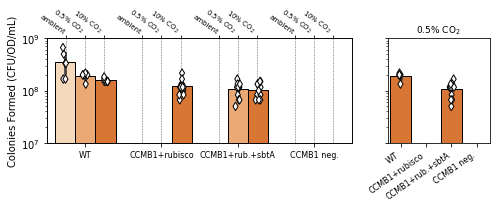

In [5]:
fig, axs = plt.subplots(ncols=2, figsize=(7,3), gridspec_kw=dict(width_ratios=[3,1]),
                        sharey=True)
order = ['WT:vec+vec',
         'CCMB1:p1A+vec',
         'CCMB1:p1A+pFA-sbtA',
         'CCMB1:vec+pFA-sbtA', ]
xlabels = 'WT,CCMB1+rubisco,CCMB1+rub.+sbtA,CCMB1 neg.'.split(',')
hue_order = 'ambient,0.5% CO2,10% CO2'.split(',')
strip_pal = ['w']*4
oranges = sns.color_palette('Oranges', n_colors=4)
greys = sns.color_palette('Greys')

# panel A: data in all CO2 conds.
plt.sca(axs[0])
plt.yscale('log')
sns.barplot(data=gly_induced_df, x='strain_label', y='CFU', hue='co2',
            order=order, hue_order=hue_order,
            dodge=0.25, edgecolor='k', palette=oranges)
ax = sns.stripplot(data=gly_induced_df, x='strain_label', y='CFU', hue='co2',
                   order=order, hue_order=hue_order, 
                   dodge=0.25, size=6, marker='d', edgecolor='k',
                   linewidth=1, palette=strip_pal)

plt.legend().set_visible(False)
plt.xticks(np.arange(4), xlabels, fontsize=8)
plt.xlabel('')
plt.ylim(1e7, 1e9)
plt.yticks(fontsize=10)
plt.ylabel('Colonies Formed (CFU/OD/mL)', fontsize=10)

xticks = np.arange(0, 0.7, 0.25) - 0.25
xticks = np.hstack([xticks, xticks+1, xticks+2, xticks+3])
xtick_str = 'ambient,0.5% CO$_2$,10% CO$_2$'.split(',')*4
for xpos in xticks:
    plt.axvline(xpos, ls='--', lw=0.5, zorder=-1, color=greys[-2])
xlim = plt.gca().get_xlim()

axT = plt.gca().twiny()
plt.sca(axT)
plt.xlim(xlim)
plt.xticks(xticks, xtick_str, ha='right', rotation=-35, fontsize=7)
plt.tick_params(pad=0)

# panel B: data in 0.5% CO2.
plt.sca(axs[1])
plt.yscale('log')
mask = gly_induced_df['co2'] == '0.5% CO2'
sub_df = gly_induced_df[mask]
sns.barplot(data=sub_df,
            x='strain_label', y='CFU', 
            order=order, dodge=0.25, edgecolor='k', color=oranges[2])
sns.stripplot(data=sub_df,
              x='strain_label', y='CFU', 
              order=order, dodge=0.25,
              size=6, marker='d', edgecolor='k', linewidth=1, palette=strip_pal)

plt.title('0.5% CO$_2$', fontsize=9)
plt.xticks(np.arange(4), xlabels, fontsize=8, ha='right', rotation=35)
plt.xlabel('')
plt.ylabel('')

plt.tight_layout()
plt.savefig('../figures/figS8_sbtA/figS8_sbtA.png', dpi=600, facecolor='w')
plt.show()